# <u><b><center>E-Commerce Products Recommendations </center></b></u>

Enhance your e-commerce platform with a robust recommendation system to provide personalized and relevant product suggestions to users.

---

## <span style="color:orange;"><b>1. Content-Based Filtering</b></span>

### **Overview**
Recommends products based on similarities in attributes and user preferences.

### **How It Works**
- Analyzes the properties of items the user has interacted with.
- Matches those properties with other items in the dataset.

### **Key Features**
- Utilizes product metadata (e.g., category, brand, price, tags).
- Works well for users with detailed interaction history.

### **Advantages**
- <span style="color:green;">No dependency on other users' data.</span>
- Suitable for niche items.

### **Challenges**
- Limited ability to recommend diverse items (e.g., beyond similar categories).
- Struggles with cold start for new users or items.

---

## <span style="color:orange;"><b>2. Collaborative Filtering</b></span>

### **Overview**
Recommends products based on interactions of similar users or items.

### **Types**
- **User-Based**: Suggests items liked by users with similar behavior.
- **Item-Based**: Recommends items similar to the ones the user has interacted with.

### **How It Works**
- Uses historical interaction data (e.g., purchases, ratings, clicks).
- Employs techniques like matrix factorization or nearest neighbors.

### **Advantages**
- <span style="color:green;">Does not require product metadata.</span>
- Captures community preferences effectively.

### **Challenges**
- Suffers from cold start problems (for new users or products).
- Requires a substantial amount of interaction data.

---

## <span style="color:orange;"><b>3. Hybrid Approaches</b></span>

### **Overview**
Combines content-based and collaborative filtering techniques for improved accuracy and coverage.

### **How It Works**
- Merges recommendations from both content-based and collaborative filtering models.
- Weighted or blended methods for combining outputs.

### **Advantages**
- <span style="color:green;">Leverages strengths of both approaches.</span>
- Addresses limitations like cold start or narrow suggestions.

### **Challenges**
- Higher computational complexity.
- Requires careful tuning of the combination strategy.

---

## Example Use Cases

- **Content-Based**: Recommending products based on user browsing history (e.g., similar books on an e-commerce platform).
- **Collaborative Filtering**: Suggesting movies watched by users with similar tastes.
- **Hybrid**: E-commerce platforms like Amazon using multiple signals to recommend products.

---

## Tools and Libraries

- **Scikit-Learn**: For implementing machine learning models.
- **Surprise/LightFM**: Specialized libraries for collaborative filtering.
- **TensorFlow Recommenders**: For advanced hybrid models.

---

## Conclusion

Choosing the right recommendation approach depends on the nature of your data, user interactions, and the scale of your platform. A hybrid model often provides the best balance of personalization and diversity.

---

### **Step1 : Load Package  & Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
from scipy.sparse import coo_matrix as mat

### **Step2 : Data Loading and Pre-processing**

In [2]:
train_data = pd.read_csv("marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv" ,sep="\t")
train_data.head() 

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [3]:
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

# E-Commerce Dataset Field Descriptions

This dataset contains detailed product information, inventory, and retail details. Below is the description of each field:

| **Field Name**                   | **Description**                                                                 |
|----------------------------------|---------------------------------------------------------------------------------|
| **Uniq Id**                      | A unique identifier for each product entry.                                    |
| **Crawl Timestamp**              | The timestamp indicating when the data was collected.                          |
| **Dataset Origin**               | The source or origin of the dataset.                                           |
| **Product Id**                   | A unique identifier for the product in the dataset.                            |
| **Product Barcode**              | The barcode associated with the product.                                       |
| **Product Company Type Source**  | The source of the product's company type information.                          |
| **Product Brand Source**         | The source of the product's brand information.                                 |
| **Product Brand Normalised Source** | The standardized source of the product's brand information.                  |
| **Product Name Source**          | The source from which the product name is retrieved.                           |
| **Match Rank**                   | The rank of the product match (e.g., for duplicate or similar product entries). |
| **Match Score**                  | The score representing the accuracy or similarity of the match.                |
| **Match Type**                   | The type of match (e.g., exact, approximate).                                  |
| **Retailer**                     | The retailer or platform selling the product.                                  |
| **Product Category**             | The category under which the product is listed.                                |
| **Product Brand**                | The brand of the product.                                                      |
| **Product Name**                 | The name of the product.                                                       |
| **Product Price**                | The price of the product.                                                      |
| **Sku**                          | The stock keeping unit identifier.                                             |
| **Upc**                          | The Universal Product Code associated with the product.                        |
| **Product Url**                  | The URL link to the product's webpage.                                         |
| **Market**                       | The market or region where the product is available.                           |
| **Product Description**          | A description of the product, including features and specifications.           |
| **Product Currency**             | The currency in which the product price is listed.                             |
| **Product Available Inventory**  | The available inventory count for the product.                                 |
| **Product Image Url**            | The URL link to the product's image.                                           |
| **Product Model Number**         | The model number assigned to the product.                                      |
| **Product Tags**                 | Tags or keywords associated with the product.                                  |
| **Product Contents**             | Details about what the product contains (e.g., package contents).              |
| **Product Rating**               | The average rating of the product (e.g., based on customer reviews).           |
| **Product Reviews Count**        | The total number of reviews for the product.                                   |
| **Bsr**                          | The Best Sellers Rank of the product (if available).                           |
| **Joining Key**                  | A key used for joining or merging datasets.                                    |

---

### **Usage**
This dataset is ideal for building:
- Product recommendation systems.
- Retail analytics.
- Market trend analysis.



In [4]:
train_data.shape

(5000, 32)

In [5]:
# lets see is there any null values or not
train_data.isna().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


### <center>**Basic Operation**</center>

# Importance of Selected Fields in E-Commerce Dataset

The chosen fields provide vital insights into each product's characteristics, enabling robust analysis for e-commerce applications. Below is a brief explanation of their significance:

- **Uniq Id**:  
  Serves as a unique identifier, ensuring data integrity and facilitating precise tracking of individual products.

- **Product Id**:  
  Represents a unique product code that helps in linking and managing products across different datasets or platforms.

- **Product Rating**:  
  Reflects customer satisfaction levels, a critical factor for analyzing product quality and predicting sales performance.

- **Product Reviews Count**:  
  Indicates the popularity and engagement level of a product, offering valuable insights into market demand.

- **Product Category**:  
  Organizes products into relevant groups, aiding in segmentation and targeted marketing strategies.

- **Product Brand**:  
  Highlights the brand identity, crucial for understanding brand loyalty and competitive analysis.

- **Product Name**:  
  Provides a recognizable product title, assisting in product differentiation and customer searchability.

- **Product Image Url**:  
  Links to the product's visual representation, a key driver for customer engagement and purchase decisions.

- **Product Description**:  
  Offers detailed information about the product's features and benefits, supporting informed purchasing decisions.

- **Product Tags**:  
  Enhances discoverability by associating the product with relevant keywords, improving search functionality and SEO.

---

These fields collectively form the foundation for building effective product recommendation systems, analyzing customer behavior, and driving strategic decision-making in e-commerce. They enable data-driven insights to enhance the overall customer shopping experience.


In [6]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count','Product Category', 'Product Brand',
                         'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3) 

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [7]:
train_data.shape

(5000, 10)

In [8]:
train_data.isna().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [9]:
# lets fill the null/missing values 

train_data["Product Rating"].fillna(0,inplace=True)
train_data["Product Reviews Count"].fillna(0,inplace=True)
train_data["Product Description"].fillna('',inplace=True) 
train_data["Product Category"].fillna('',inplace=True)
train_data["Product Brand"].fillna('',inplace=True)

In [10]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [11]:
train_data.duplicated().sum()

0

**we can see the fields/Columns we have used are having quite big names ,lets short it for convienience**

In [12]:
#create map of names to columns

mapping_data_columns = {
    "Uniq Id" : "ID",
    "Product Id" : "prod_id",
    "Product Rating" : "Rating",
    "Product Reviews Count" : "Reviews_count",
    "Product Category" : "Category",
    "Product Brand" : "Brand",
    "Product Name" : "Prod_name",
    "Product Image Url" : "Image_url",
    "Product Description" : "Description",
    "Product Tags" : "Tags"  
}

train_data.rename(columns=mapping_data_columns,inplace=True)

train_data.columns

Index(['ID', 'prod_id', 'Rating', 'Reviews_count', 'Category', 'Brand',
       'Prod_name', 'Image_url', 'Description', 'Tags'],
      dtype='object')

In [13]:
train_data.head(2)

,ID,prod_id,Rating,Reviews_count,Category,Brand,Prod_name,Image_url,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."


**we can see the `ID` AND `prod_id` column is a mixture of int and string , Let's separate them**

In [14]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['prod_id'] = train_data['prod_id'].str.extract(r'(\d+)').astype(float)

In [15]:
train_data.head()

,ID,prod_id,Rating,Reviews_count,Category,Brand,Prod_name,Image_url,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


### **Step3 : Exploratory Data Analysis**

In [16]:
print(f"The number of unique Users : {train_data['ID'].nunique()}")
print(f"The number of unique Products : {train_data['prod_id'].nunique()}")
print(f"The number of unique Rating : {train_data['Rating'].nunique()}")

The number of unique Users : 1721
The number of unique Products : 1697
The number of unique Rating : 36


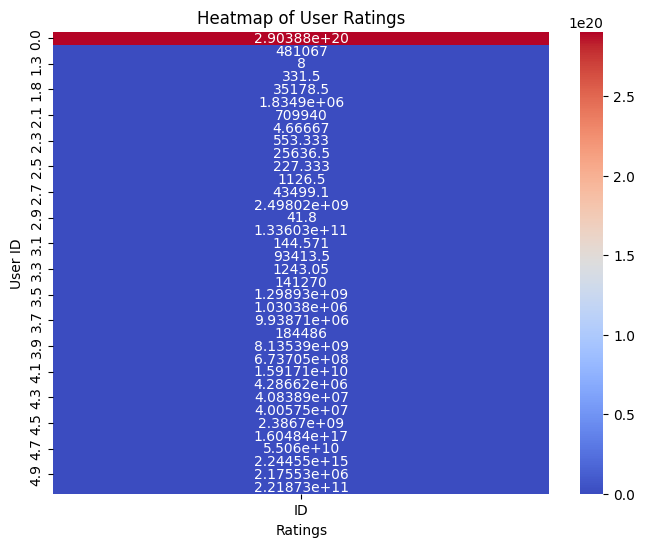

In [17]:
# Pivot the DataFrame to create a heatmap
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

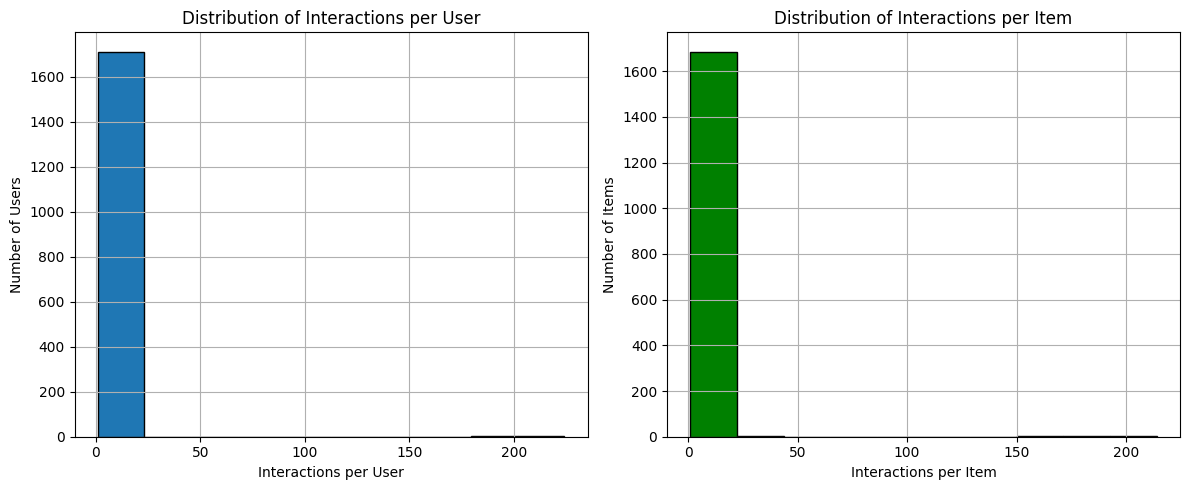

In [18]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['prod_id'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7240\3658890462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_items.index, y=popular_items.values, palette="PuBu")


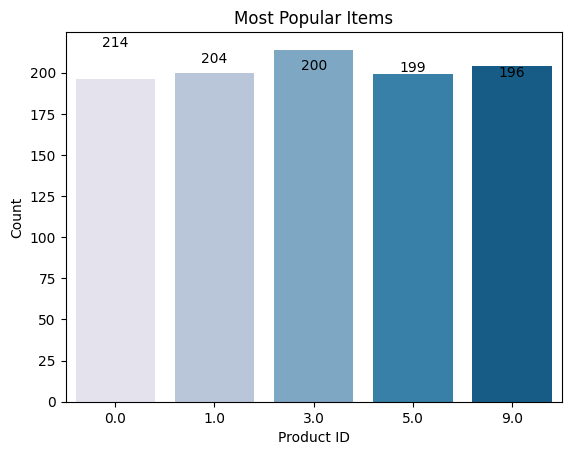

In [19]:
# Extract the top 5 most popular items
popular_items = train_data['prod_id'].value_counts().head(5)

# Create a bar plot using Seaborn
sns.barplot(x=popular_items.index, y=popular_items.values, palette="PuBu")

# Add title and labels
plt.title("Most Popular Items")
plt.xlabel("Product ID")
plt.ylabel("Count")

# Annotate the values above each bar
for i, value in enumerate(popular_items.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

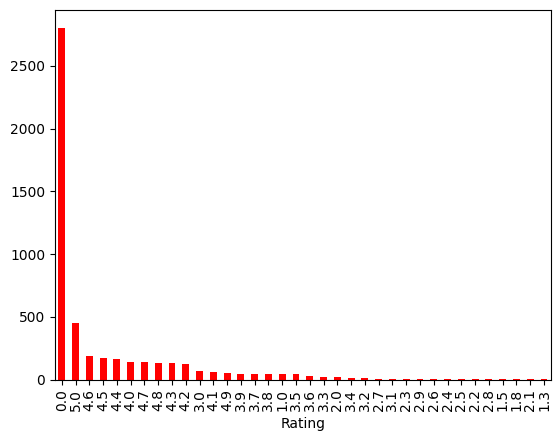

In [20]:
# Count the number of ratings
rating_counts = train_data['Rating'].value_counts().plot(kind="bar" , color="red")

### **Step3 : Data Cleaning and Tags Creation**

In [21]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

# Function to clean the text

def clean_and_extract_text(text):
    doc = nlp(text.lower())
    # Remove punctuation and convert to lowercase
    tags = [tokon.text for tokon in doc if tokon.text.isalnum() and tokon.text not in STOP_WORDS]
    return  ", ".join(tags)
    
columns_to_extract_tags_from = ["Category", "Brand", "Description"]

for column in columns_to_extract_tags_from:
    train_data[column ] = train_data[column].apply(clean_and_extract_text)

In [22]:
# concat the cleaned tags from all relevant columns
train_data["Tags"] = train_data[columns_to_extract_tags_from].apply(lambda row:", ".join(row),axis=1 )

In [23]:
train_data.head()

,ID,prod_id,Rating,Reviews_count,Category,Brand,Prod_name,Image_url,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


## **<center> Rating Based Recomendations System </center>**

In [24]:
train_data.columns

Index(['ID', 'prod_id', 'Rating', 'Reviews_count', 'Category', 'Brand',
       'Prod_name', 'Image_url', 'Description', 'Tags'],
      dtype='object')

In [25]:
average_rating = train_data.groupby(["Prod_name","Reviews_count","Brand","Image_url"])["Rating"].mean().reset_index()

In [26]:
top_rated_items = average_rating.sort_values(by = "Rating", ascending = False)

rating_based_recomendations = top_rated_items.head(10)

rating_based_recomendations

,Prod_name,Reviews_count,Brand,Image_url,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4.0,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5.0
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2.0,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5.0
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2.0,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5.0
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24.0,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5.0
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2.0,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1.0,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5.0
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1.0,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5.0
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4.0,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5.0
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12.0,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5.0
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1.0,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0


In [27]:
rating_based_recomendations["Rating"] = rating_based_recomendations["Rating"].astype(int)

rating_based_recomendations["Reviews_count"] = rating_based_recomendations["Reviews_count"].astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7240\1899648913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendations["Rating"] = rating_based_recomendations["Rating"].astype(int)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7240\1899648913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendations["Reviews_count"] = rating_based_recomendations["Reviews_count"].astype(int)


In [28]:
print("Rating based Recomendation System:(Trending Products)")
rating_based_recomendations[['Prod_name', 'Reviews_count', 'Brand', 'Image_url', 'Rating']] = rating_based_recomendations[['Prod_name', 'Reviews_count', 'Brand', 'Image_url', 'Rating']]  
rating_based_recomendations 

Rating based Recomendation System:(Trending Products)


C:\Users\Dell\AppData\Local\Temp\ipykernel_7240\2768333361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendations[['Prod_name', 'Reviews_count', 'Brand', 'Image_url', 'Rating']] = rating_based_recomendations[['Prod_name', 'Reviews_count', 'Brand', 'Image_url', 'Rating']]


,Prod_name,Reviews_count,Brand,Image_url,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


## <center> **Content Based Recomendations System (User Preferences or Item Similarity)**</center>

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words= "english")

tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data["Tags"])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [30]:
train_data.Prod_name.head()[0]

'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

In [31]:
items_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data["Prod_name"]==items_name].index[0]

In [32]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [33]:
similar_items

[(0, 1.0),
 (1, 0.0034757732312750934),
 (2, 0.003632261383918426),
 (3, 0.013151377769582695),
 (4, 0.0010160210269512565),
 (5, 0.006575809352364544),
 (6, 0.007328463323503305),
 (7, 0.05151153351231972),
 (8, 0.011109860476686882),
 (9, 0.003151730172379002),
 (10, 0.0),
 (11, 0.1587457628497677),
 (12, 0.04098008361044332),
 (13, 0.0030468898686792107),
 (14, 0.0),
 (15, 0.0059693458494800575),
 (16, 0.3398806576145607),
 (17, 0.0),
 (18, 0.004556103655641239),
 (19, 0.0038887588090144405),
 (20, 0.008764149884645193),
 (21, 0.0),
 (22, 0.009458897953602717),
 (23, 0.0),
 (24, 0.00517558550504985),
 (25, 0.0),
 (26, 0.007172857177991527),
 (27, 0.003259884833851906),
 (28, 0.2812052802661157),
 (29, 0.0),
 (30, 0.007207084216281134),
 (31, 0.006229511383962109),
 (32, 0.008773214115073319),
 (33, 0.010764957375515107),
 (34, 0.005638510010303099),
 (35, 0.01026020396150954),
 (36, 0.0020164119152476824),
 (37, 0.0032782013683666338),
 (38, 0.005164021192923341),
 (39, 0.0),
 (40, 

In [34]:
similar_items = sorted(similar_items,key=lambda x:x[1],reverse=True)

In [35]:
top_similar_items = similar_items[1:10]

recomended_items_indics = [x[0] for x in top_similar_items]

In [36]:
train_data.columns

Index(['ID', 'prod_id', 'Rating', 'Reviews_count', 'Category', 'Brand',
       'Prod_name', 'Image_url', 'Description', 'Tags'],
      dtype='object')

In [37]:
train_data.iloc[recomended_items_indics][["prod_id","Prod_name","Reviews_count","Brand"]]

,prod_id,Prod_name,Reviews_count,Brand
156,58.0,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,2.0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,7.0,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,4103.0,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,4.0,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,3402.0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,58.0,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,94.0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,7.0,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


### <center> **Function To Recommend Products For Content Base**</center>

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendation(train_data, items_name, top_n=10):
    # Check if the item is present in the training data
    if items_name not in train_data["Prod_name"].values:
        print(f"Item '{items_name}' not found in the training data.")
        return pd.DataFrame()
    
    # Create a TF-IDF vectorizer for item description
    tfidf_vectorizer = TfidfVectorizer(stop_words="english")
    
    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data["Tags"])
    
    # Calculate the cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
    
    # Find the index of the given item
    item_index = train_data[train_data["Prod_name"] == items_name].index[0]
    
    # Get the cosine similarity scores for the given item
    similarity_scores = cosine_similarities_content[item_index]
    
    # Create a list of (index, similarity score) pairs
    similar_items = list(enumerate(similarity_scores))
    
    # Sort the similar items by similarity scores in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    
    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]
    
    # Get the indices of the top similar items
    recommended_items_indices = [x[0] for x in top_similar_items]
    
    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_items_indices][["prod_id", "Prod_name", "Reviews_count", "Brand"]]
    return recommended_items_details


In [39]:
# for example : get content based recommmendation for a specific items 

items_name = "OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath"
content_recomeded = content_based_recommendation(train_data, items_name, top_n=8)
content_recomeded

,prod_id,Prod_name,Reviews_count,Brand
156,58.0,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,2.0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,7.0,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,4103.0,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,4.0,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,3402.0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,58.0,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,94.0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi


In [40]:
# for example : get content based recommmendation for a specific items

items_name = train_data["Prod_name"][4]
items_name

'Gillette TRAC II Plus Razor Blade Refills, Fit TRAC II Handles, 10 ct'

In [41]:
content_based_recommendation(train_data, items_name, top_n=8)

,prod_id,Prod_name,Reviews_count,Brand
752,9.0,Gillette Trac II Plus Refill Razor Blade Cartr...,16.0,gillette
4911,4.0,Gillette SkinGuard Sensitive Razor for Men Ref...,0.0,gillette
1155,657398.0,Gillette Daisy Classic Disposable Womens Razor...,8.0,gillette
2895,47.0,Gillette Platinum Double Edge Blades,0.0,gillette
889,3.0,Gillette Venus Embrace Sensitive Womens Razor ...,955.0,gillette
3884,51.0,"BIC Sensitive Shaver Mens Disposable Razor, Si...",219.0,bic
2084,65542.0,Harrys Mens Razor: Bright Orange Handle and 2 ...,538.0,harry
1000,9219.0,Gillette Series Cool Wave Mens Aftershave Spla...,136.0,gillette


## **Collaborative Filtering (user item similarity)**


In [42]:
train_data.columns

Index(['ID', 'prod_id', 'Rating', 'Reviews_count', 'Category', 'Brand',
       'Prod_name', 'Image_url', 'Description', 'Tags'],
      dtype='object')

In [43]:
user_item_matrix = train_data.pivot_table(index="ID", columns="prod_id", values="Rating", aggfunc="mean").fillna(0).astype(int)

In [44]:
user_similarity = cosine_similarity(user_item_matrix)

In [45]:
target_user_id = 4 
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [46]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::1][1:]

In [47]:
train_data.columns

Index(['ID', 'prod_id', 'Rating', 'Reviews_count', 'Category', 'Brand',
       'Prod_name', 'Image_url', 'Description', 'Tags'],
      dtype='object')

In [48]:
recommended_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data["prod_id"].isin(recommended_items)][["Prod_name","Reviews_count","Brand","Image_url", "Rating"]]

In [49]:
recommended_items_details.head(10)

,Prod_name,Reviews_count,Brand,Image_url,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


## <center>**Function That Recommend Items**</center>

In [50]:
def collaborative_filtering_recommendation(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index="ID", columns="prod_id", values="Rating", aggfunc="mean").fillna(0)
    
    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)
    
    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)
    
    # Get similarity scores for the target user
    user_similarities = user_similarity[target_user_index]
    
    # Sort users by similarity in descending order (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]
    
    # Generate recommendations based on similar users
    recommended_items = set()  # Use a set to avoid duplicates
    
    for user_index in similar_user_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (user_item_matrix.iloc[target_user_index] == 0)
        recommended_item_indices = rated_by_similar_user[not_rated_by_target_user].index
        
        # Add these items to the recommendations set
        recommended_items.update(recommended_item_indices)
        
        # Stop if we've gathered enough recommendations
        if len(recommended_items) >= top_n:
            break
    
    # Get the details of the recommended items
    recommended_items = list(recommended_items)[:top_n]
    recommended_items_details = train_data[train_data["prod_id"].isin(recommended_items)][
        ["Prod_name", "Reviews_count", "Brand", "Image_url", "Rating"]
    ]
    
    return recommended_items_details.head(top_n)


In [51]:
# for example
target_user_id=4
top_n = 5
collaborative_filtering_recc = collaborative_filtering_recommendation(train_data, target_user_id)
print(f"Top{top_n} recommendation for users {target_user_id} :")
collaborative_filtering_recc

Top5 recommendation for users 4 :


,Prod_name,Reviews_count,Brand,Image_url,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
71,La Roche-Posay Effaclar Duo Dual Action Acne T...,25.0,"la, roche, posay",https://i5.walmartimages.com/asr/164f6506-75c2...,0.0
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0
308,Everpro Gray Away Temporary Root Concealer Roo...,7.0,generic,https://i5.walmartimages.com/asr/2319ae96-7e30...,0.0
310,3 Pack - Gillette After Shave Gel Sensitive Sk...,33.0,gillette,https://i5.walmartimages.com/asr/34c4a590-f089...,4.6
316,OROFLUIDO - Beauty Elixir 3.3oz,1.0,orofluido,https://i5.walmartimages.com/asr/d2112146-1269...,5.0


## **Hybrid Recommendations**

#### **combining the `Content-Based` and `Collaborative Filtering`**

In [67]:
def hybrid_recommendations(train_data, target_user_id, items_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendation(train_data, items_name, top_n)
    
    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendation(train_data, target_user_id, top_n)
    
    # Combine the two recommendation lists
    hybrid_rec = pd.concat(
        [content_recomeded, collaborative_filtering_recc],
        ignore_index=True
    ).drop_duplicates()
    
    return hybrid_rec.head(top_n)


In [68]:
content_recomeded = pd.DataFrame()  # Avoid such conflicts


In [74]:
train_data.Prod_name[2]

'Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT'

In [75]:
target_user_id = 4
item_name = "Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT"
hybrid_rec = hybrid_recommendations(train_data, target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec


Top 10 Hybrid Recommendations for User 4 and Item 'Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT':


,Prod_name,Reviews_count,Brand,Image_url,Rating
0,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
1,La Roche-Posay Effaclar Duo Dual Action Acne T...,25.0,"la, roche, posay",https://i5.walmartimages.com/asr/164f6506-75c2...,0.0
2,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
3,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
4,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
5,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
6,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0
7,Everpro Gray Away Temporary Root Concealer Roo...,7.0,generic,https://i5.walmartimages.com/asr/2319ae96-7e30...,0.0
8,3 Pack - Gillette After Shave Gel Sensitive Sk...,33.0,gillette,https://i5.walmartimages.com/asr/34c4a590-f089...,4.6
9,OROFLUIDO - Beauty Elixir 3.3oz,1.0,orofluido,https://i5.walmartimages.com/asr/d2112146-1269...,5.0


In [71]:
train_data["Prod_name"][5]

'Old Spice Artisan Styling High Hold Matte Finish Molding Clay, 2.64 oz'

In [73]:
#   Example usage

target_user_id = 10 
items_name = "Old Spice Artisan Styling High Hold Matte Finish Molding Clay, 2.64 oz"

hybrid_recom = hybrid_recommendations(train_data,target_user_id,items_name,top_n=10)
print(f" Top 10 Hybrid Recommendation for user {target_user_id} and item {items_name} :")
hybrid_recom

 Top 10 Hybrid Recommendation for user 10 and item Old Spice Artisan Styling High Hold Matte Finish Molding Clay, 2.64 oz :


,Prod_name,Reviews_count,Brand,Image_url,Rating
0,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
1,La Roche-Posay Effaclar Duo Dual Action Acne T...,25.0,"la, roche, posay",https://i5.walmartimages.com/asr/164f6506-75c2...,0.0
2,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
3,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
4,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
5,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
6,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0
7,Everpro Gray Away Temporary Root Concealer Roo...,7.0,generic,https://i5.walmartimages.com/asr/2319ae96-7e30...,0.0
8,3 Pack - Gillette After Shave Gel Sensitive Sk...,33.0,gillette,https://i5.walmartimages.com/asr/34c4a590-f089...,4.6
9,OROFLUIDO - Beauty Elixir 3.3oz,1.0,orofluido,https://i5.walmartimages.com/asr/d2112146-1269...,5.0
